<div class="alert alert-info">
    
**Заказчик этого исследования — Министерство культуры Российской Федерации**.
    
Нам необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить особое внимание фильмам, которые получили государственную поддержку. Попробывать ответить на вопрос, насколько такие фильмы интересны зрителю.
    
Мы будете работать с данными, опубликованными на портале открытых данных **Министерства культуры**. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта **КиноПоиск**. 

</div>

## Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

In [1]:
import matplotlib.pyplot as plt # импортируем библиотеку matplotlib для будущих графиков
import pandas as pd # импортируем библиотеку pandas 
import numpy as np # импортируем библиотеку numpy
import seaborn as sns # импортируем библиотеку seaborn
from IPython.display import display # импортируем библиотеку display для вывода таблиц
pd.set_option('display.float_format', '{:.1f}'.format)
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv') # создадим переменную по имени файла
display(mkrf_movies.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<div class="alert alert-info">
    
Импортировали библиотеки `matplotlib.pyplot`, `pandas`, `numpy` и `IPython.display`. Далее создадим переменную `mkrf_movies` по имени файла и выведем первые **5** строк датафрейма. Данные распределены по **15** колонкам:
- `title` - *название фильма*
- `puNumber` - *номер прокатного удостоверения* 
- `show_start_date` - *дата премьеры фильма*
- `type` - *тип фильма*
- `film_studio` - *студия-производитель*
- `production_country` - *страна-производитель*
- `director` - *режиссёр*
- `producer` - *продюсер*
- `age_restriction` - *возрастная категория*
- `refundable_support` - *объём возвратных средств государственной поддержки*
- `nonrefundable_support` - *объём невозвратных средств государственной поддержки*
- `budget` - *общий бюджет фильма*
- `financing_source` - *источник государственного финансирования*
- `ratings` - *рейтинг фильма на КиноПоиске*
- `genres` - *жанр фильма*

</div>

In [2]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

<div class="alert alert-info">
    
Выведем информацию о датафрейме. Количество строк **7486**. Тип данных в основном `object`, в дальнейшем по каждой колонке разберемся отдельно.

</div>

In [3]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(mkrf_shows.head(10))

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4
3,111000117,12260956.0
4,111000118,163684057.8
5,111000119,4293649.5
6,111000212,200.0
7,111000216,355567.0
8,111000313,710.0
9,111000314,1607970.0


<div class="alert alert-info">
    
Создадим переменную `mkrf_shows` по имени файла и выведем первые **10** строк датафрейма. Данные распределены по **2** колонкам:
- `puNumber` - *номер прокатного удостоверения*
- `box_office` - *сборы в рублях*

</div>

In [4]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


<div class="alert alert-info">
    
Выведем информацию о датафрейме. Количество строк **3158**. Тип данных `int64` и `float64`.

</div>

In [5]:
display(mkrf_movies[mkrf_movies['puNumber']=='нет'])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


<div class="alert alert-info">
    
При попытке поменять тип колонки `puNumber` выдало ошибку в которой было указано наличие строки с именем `"нет"`. Найдем ее и выведем для анализа. Она одна, поэтому проще от нее избавится.

</div>

In [6]:
mkrf_movies.drop(labels= 1797, axis = 0, inplace = True)

<div class="alert alert-info">
    
Удалили строку **1797** и выровнили индексы.

</div>

In [7]:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

<div class="alert alert-info">
    
В колонке `puNumber` указаны значения номера прокатного удостоверения. Поэтому можно поменять тип колонки на `int`.

</div>

In [8]:
# data = mkrf_movies.merge(mkrf_shows, on= 'puNumber', how='outer')
data = mkrf_movies.merge(mkrf_shows, on= 'puNumber', how='left')
display(data.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-info">
    
Методом `merge` объеденяем два датафрейма по колонке `puNumber` и записываем в новый датафрейм `data`. При объединении двух датафреймов, в первую очередь приследуем цель добавления параметра к исследуемым данным, поэтому применяем параметр `how=left`.  

</div>

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<div class="alert alert-info">
    
Еще раз выводим информацию по датафрейму. Строк стало на одну меньше, а колонок на одну больше.

</div>

### Шаг 2. Предобработка данных

In [10]:
data = data.rename(columns={'puNumber': 'punumber',})

<div class="alert alert-info">
    
Заменяем название колонки `puNumber`, приводим его к нижнему регистру.

</div>

#### Шаг 2.1. Проверим типы данных

In [11]:
data['show_start_date'] = \
pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
data['show_start_date'].head(5)

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
3   2016-06-10 12:00:00+00:00
4   2015-07-29 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]

<div class="alert alert-info">
    
В колонке `show_start_date` указана дата примьеры, поэтому можем заменяем тип с `object` на `datetime64`.

</div>

In [12]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

<div class="alert alert-info">
    
В колонке `ratings` присутствуют значения со знаком **"%"**. Их переименуем приведем все значение к единому типу.

</div>

In [13]:
data['ratings'] = data['ratings'].replace('97%', '9.7')
data['ratings'] = data['ratings'].replace('19%', '1.9')
data['ratings'] = data['ratings'].replace('88%', '8.8')
data['ratings'] = data['ratings'].replace('98%', '9.8')
data['ratings'] = data['ratings'].replace('99%', '9.9')
data['ratings'] = data['ratings'].replace('83%', '8.3')
data['ratings'] = data['ratings'].replace('64%', '6.4')
data['ratings'] = data['ratings'].replace('89%', '8.9')
data['ratings'] = data['ratings'].replace('91%', '9.1')
data['ratings'] = data['ratings'].replace('28%', '2.8')
data['ratings'] = data['ratings'].replace('94%', '9.4')
data['ratings'] = data['ratings'].replace('62%', '6.2')
data['ratings'] = data['ratings'].replace('79%', '7.9')
data['ratings'] = data['ratings'].replace('90%', '9.0')
data['ratings'] = data['ratings'].astype('float')

<div class="alert alert-info">
    
Заменим значения с процентами, на значения в формате `float`.

</div>

In [14]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

<div class="alert alert-info">
    
Проверяем. Все исправлено.

</div>

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [15]:
data.isna().sum()

title                       0
punumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

<div class="alert alert-info">
    
Выведем общую информацию о пропусках по всему датафрейму. Далее посмотрим каждую колонку отдельно.

</div>

In [16]:
data['film_studio']

0       Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...
1                                   Киностудия "Мосфильм"
2       Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
3       Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
4       Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...
                              ...                        
7480                                 Севен Артс Продакшнз
7481    Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...
7482             Никелодеон Анимейшн Студиос, Спин Мастер
7483             Анимаккорд Лтд., ООО Студия "АНИМАККОРД"
7484             Анимаккорд Лтд., ООО Студия "АНИМАККОРД"
Name: film_studio, Length: 7485, dtype: object

<div class="alert alert-info">
    
В колонке `film_studio` указан список киностудий принимавших участие в создании картины. Пропусков **18**, это около четверти процента. Поэтому их можно просто удалить.

</div>

In [17]:
data['production_country']

0                           США
1                          СССР
2                           США
3                           США
4                           США
                 ...           
7480             Великобритания
7481                        США
7482               США - Канада
7483    Республика Кипр, Россия
7484    Республика Кипр, Россия
Name: production_country, Length: 7485, dtype: object

<div class="alert alert-info">
    
В колонке `production_countryo` указан список стран принимавших участие в создании картины. Пропусков **2**, это очень маленькое и не существенное количество. Поэтому их можно просто удалить.

</div>

In [18]:
data['director']

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
3       Тимур Бекмамбетов
4       Тимур Бекмамбетов
              ...        
7480          Фил Грабски
7481           Ник Пауэлл
7482     Чарльз Е.Бастьен
7483             А.Беляев
7484             И.Трусов
Name: director, Length: 7485, dtype: object

<div class="alert alert-info">
    
В колонке `director` указан режисер картины. Пропусков **9**, значение очень маленькое. Поэтому их можно просто удалить.

</div>

In [19]:
data = data.dropna(subset= ['film_studio', 'production_country', 'director'])

<div class="alert alert-info">
    
Методом `dropna` избавимся от пропусков в колонках `film_studio`, `production_country` и `director`.

</div>

In [20]:
data['producer'].isna().sum()

564

In [21]:
data['producer'] = data['producer'].fillna('нет_данных')

<div class="alert alert-info">
    
В колонке `producer` выявлено **564**, это **7,5%** от общей массы. В ней указан список продюсеров принимающих участие в создании картины. Не смотря на то, что значений не много, оставим их для анализа, а пропуски заменим указателем **"нет_данных"**.

</div>

In [22]:
data.isna().sum()

title                       0
punumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   947
genres                    956
box_office               4303
dtype: int64

<div class="alert alert-info">
    
От небольших пропусков избавились, остальные будем анализировать дальше.

</div>

#### Шаг 2.3. Изучим дубликаты в датафрейме

In [23]:
data.duplicated().sum()

0

<div class="alert alert-info">
    
Проверили датафрейм на наличие дубликатов. Дубликатов нет. Хорошо.

</div>

In [24]:
data['title'].duplicated().sum()

713

<div class="alert alert-info">
    
Проверили дубликаты в названиях картин, они связаны с тем, что на одну картину иногда выдают несколько прокатных удостоверений.

</div>

In [25]:
data['title'].duplicated()

0       False
1       False
2       False
3        True
4        True
        ...  
7480    False
7481    False
7482    False
7483    False
7484    False
Name: title, Length: 7458, dtype: bool

In [26]:
data[data['title']=='Особо опасен']

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-info">
    
Посмотрим на типичный пример дубликата по названию. Отличия не только в номере прокатного удостоверения, но и в дате выхода в прокат. Остальные данные идентичны.

</div>

In [27]:
data = data.drop_duplicates(subset=['title'], keep='first')

<div class="alert alert-info">
    
Удалим дубликаты, оставив только первые значения.

</div>

In [28]:
data[data['title']=='Особо опасен']

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<div class="alert alert-info">
    
Дубликаты удалили.

</div>

In [29]:
data['punumber'].duplicated().sum()

0

<div class="alert alert-info">
    
Дубликатов нет.

</div>

#### Шаг 2.4. Изучим категориальные значения

In [30]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

<div class="alert alert-info">
    
В колонке `type` обнаружен не явный дубликат *(`Художественный` и `Анимационный` записан с пробелом в начале)*. Это необходимо исправить.

</div>

In [31]:
data['type'] = data['type'].str.strip()# используя метод str.strip() избавимся от лишних пробелов в названиях
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

<div class="alert alert-info">
    
Значение исправили

</div>

<div class="alert alert-info">
    
В колонках `film_studio`, `production_country`, `producer` и `genres` данные (как основные, так и второстепенные) записаны через запятую и имеют очень много значений, в связи с этим очень трудно правильно категоризировать данные по этим колонка. Как вариант, при необходимости, можно превратить данные в строке в список и обращаться по индексу.

</div>

#### Шаг 2.5. Проверим количественные значения

##### Объем возвратных средств государственной поддержки

In [32]:
data['refundable_support'].count()

329

<div class="alert alert-info">
    
В колонке с указанием объема возвратных средств гос поддержки всего **329** картины.

</div>

In [33]:
data['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

<div class="alert alert-info">
    
Посмотрим на список уникальных значений. Все значения большие, но есть и **0**.

</div>

In [34]:
data['refundable_support'].describe()

count         329.0
mean     11653495.4
std      24540030.3
min             0.0
25%             0.0
50%             0.0
75%      15000000.0
max     180000000.0
Name: refundable_support, dtype: float64

<div class="alert alert-info">
    
Выведем основную информацию о колонке. Медианное значение **0**, минимум **0**, среднее значение **11 653 495**, максимум **180 000 000**.

</div>

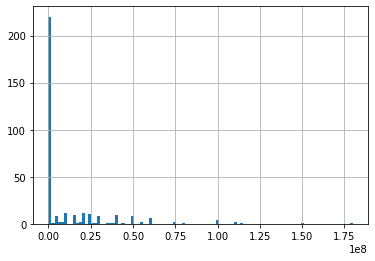

In [35]:
data['refundable_support'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Построим гистограмму. Она не очень информативна, нулевые значения перетягивают все внимание.

</div>

In [36]:
data['refundable_support'].sort_values(ascending= False).head(10)

7113   180000000.0
3350   150000000.0
6471   115000000.0
5436   110000000.0
3163   110000000.0
7465   100000000.0
7463   100000000.0
5568   100000000.0
3452   100000000.0
7452    80000000.0
Name: refundable_support, dtype: float64

<div class="alert alert-info">
    
Выведем отсортированные по убыванию значения. Первые девять позиций больше **100 000 000**.

</div>

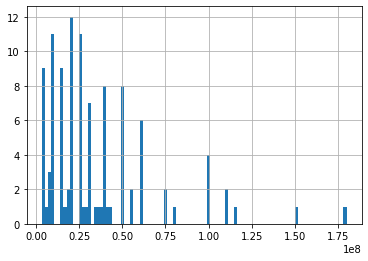

In [37]:
refundable_support_not_zero = data.query('refundable_support > 0')
refundable_support_not_zero['refundable_support'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Выведем гистограмму без нулевых значений. Наблюдаем разброс значений.

</div>

##### Объём невозвратных средств государственной поддержки

In [38]:
data['nonrefundable_support'].count()

329

<div class="alert alert-info">
    
В колонке с указанием объема невозвратных средств гос поддержки всего **329** картины

</div>

In [39]:
data['nonrefundable_support'].unique()

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       0.00000000e+00, 6.00000000e+07, 2.75000000e+07, 2.69500000e+07,
       1.10000000e+08, 1.50000000e+07, 5.90000000e+07, 2.50000000e+08,
       3.70000000e+07, 3.50000000e+07, 2.01452850e+07, 2.59000000e+07,
       6.00000000e+06, 3.92104482e+08, 2.52000000e+07, 2.29040000e+07,
       2.90000000e+07, 5.10000000e+07, 4.70000000e+06, 5.30000000e+06,
       2.17000000e+07, 2.49860000e+07, 2.53450000e+07, 1.33000000e+08,
       1.75000000e+08, 3.01239150e+07, 2.85000000e+07, 3.00000000e+08,
      

<div class="alert alert-info">
    
Посмотрим на список уникальных значений. Все значения большие, аномалий не видно.

</div>

In [40]:
data['nonrefundable_support'].describe()

count         329.0
mean     48059842.9
std      57011892.6
min             0.0
25%      25000000.0
50%      30000000.0
75%      40000000.0
max     400000000.0
Name: nonrefundable_support, dtype: float64

<div class="alert alert-info">
    
Выведем основную информацию о колонке. Медианное значение **30 000 000**, минимум **0**, среднее значение **48 059 842**, максимум **400 000 000**.

</div>

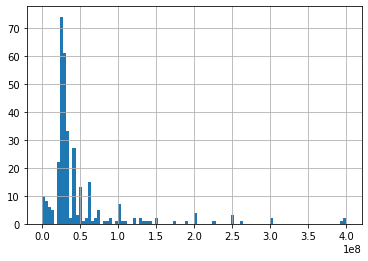

In [41]:
data['nonrefundable_support'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Построим гистограмму. Видим небольшую область в районе нулевых значений, но основной пик приходится на **30 000 000**.

</div>

In [42]:
data['nonrefundable_support'].sort_values(ascending= False).head(10)

7463   400000000.0
5652   400000000.0
2919   392104482.0
3350   300000000.0
6886   300000000.0
5825   260000000.0
2698   250000000.0
3564   250000000.0
5568   250000000.0
5501   225000000.0
Name: nonrefundable_support, dtype: float64

<div class="alert alert-info">
    
Выведем отсортированные по убыванию значения. Первая тройка составляет **400 000 000**.

</div>

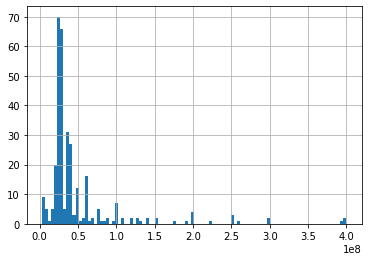

In [43]:
nonrefundable_support_not_zero = data.query('nonrefundable_support > 0')
nonrefundable_support_not_zero['nonrefundable_support'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Выведем гистограмму без нулевых значений. Отличии минимальные.

</div>

##### Общий бюджет фильма

In [44]:
data['budget'].count()

329

<div class="alert alert-info">
    
В колонке с указанием общего бюджета всего **329** картин

</div>

In [45]:
data['budget'].unique()

array([           nan, 7.94119000e+07, 3.71428570e+07, 1.76023490e+08,
       4.05741400e+07, 4.00151220e+07, 5.18500000e+07, 2.20588394e+08,
       8.62100670e+07, 1.39551503e+08, 4.85714300e+07, 8.00000000e+07,
       3.62595000e+07, 7.08761720e+07, 2.52489571e+08, 7.49100000e+07,
       0.00000000e+00, 8.97823120e+07, 4.36437176e+08, 4.05000000e+07,
       6.84906060e+07, 4.50066090e+07, 1.31000000e+08, 5.00000000e+08,
       6.10114070e+07, 4.00000000e+07, 3.73712620e+07, 3.52969500e+07,
       4.30000000e+07, 7.74017510e+07, 3.50000000e+07, 5.11967110e+07,
       9.01200000e+07, 2.67288892e+08, 4.92804960e+07, 4.90714280e+07,
       4.69688830e+07, 5.51950000e+07, 1.56360666e+08, 3.74247960e+07,
       3.57600600e+07, 2.81155800e+07, 3.79436520e+07, 1.38325738e+08,
       4.22525090e+07, 3.99900000e+07, 1.12000000e+08, 5.57294240e+07,
       3.57142860e+07, 1.39357211e+08, 5.02187410e+07, 4.02650000e+07,
       3.90579710e+07, 9.25000000e+07, 4.14978600e+07, 8.62363940e+07,
      

<div class="alert alert-info">
    
Посмотрим на список уникальных значений. Все значения большие, аномалий не видно.

</div>

In [46]:
data['budget'].describe()

count          329.0
mean     125146705.0
std      183916186.3
min              0.0
25%       42000000.0
50%       68490606.0
75%      140025000.0
max     2305074303.0
Name: budget, dtype: float64

<div class="alert alert-info">
    
Выведем основную информацию о колонке. Медианное значение **68 490 606**, минимум **0**, среднее значение **125 146 705**, максимум **2 305 074 303**.

</div>

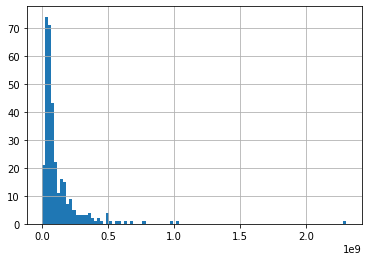

In [47]:
data['budget'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Построим гистограмму. Видим один пик, далее снижение.

</div>

In [48]:
data['budget'].sort_values(ascending= False).head(10)

7113   2305074303.0
5436   1032905957.0
7463    980000000.0
7170    779941965.0
3350    684200536.0
2919    635283867.0
5652    590192191.0
6548    563784717.0
3254    528441977.0
5568    500012729.0
Name: budget, dtype: float64

<div class="alert alert-info">
    
Выведем отсортированные по убыванию значения. Первая и вторая позиции с разницей в **милиард**. 

</div>

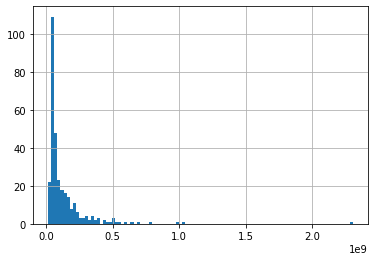

In [49]:
budget_not_zero = data.query('budget > 0')
budget_not_zero['budget'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Выведем гистограмму без нулевых значений. Отличии минимальные.

</div>

##### Сборы в рублях

In [50]:
data['box_office'].count()

3014

<div class="alert alert-info">
    
В колонке с указанием сборов **3014** картины. Таким образом, меньше половины картин имеют информацию о сборах.

</div>

In [51]:
data['box_office'].nunique()

2831

<div class="alert alert-info">
    
В колонке **2831** уникальных значений.

</div>

In [52]:
data['box_office'].describe()

count         3014.0
mean      75707668.7
std      237807402.7
min              0.0
25%         117075.0
50%        2435268.4
75%       23755074.1
max     3073568690.8
Name: box_office, dtype: float64

<div class="alert alert-info">
    
Выведем основную информацию о колонке. Медианное значение **2 435 268**, минимум **0**, среднее значение **75 707 668**, максимум **3 073 568 690**.

</div>

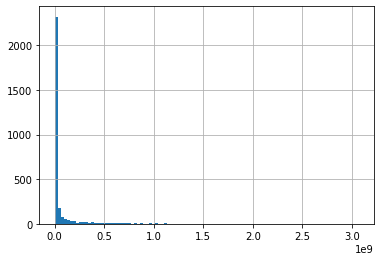

In [53]:
data['box_office'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Выведем гистограмму по сборам. Она не информативна, близкие к нулевому значения, искажают картину.

</div>

In [54]:
data['box_office'].sort_values(ascending= False).head(10)

7455   3073568690.8
5652   2779686144.0
6819   2576613776.8
6548   2271754004.5
3487   2118396119.0
2858   2048126108.0
3754   1971005085.0
6273   1913257923.1
7215   1911944866.0
7257   1890368076.5
Name: box_office, dtype: float64

<div class="alert alert-info">
    
Выведем отсортированные по убыванию значения. Первые шесть позиций больше **2 000 000 000**.

</div>

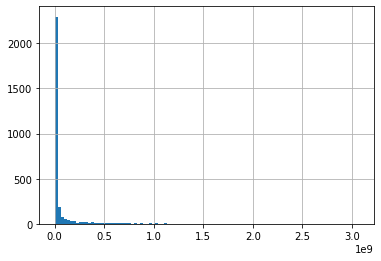

In [55]:
box_office_not_zero = data.query('box_office > 0')
box_office_not_zero['box_office'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Гистограмма без нулевых значений, информативность не повысила.

</div>

<div class="alert alert-info">
    
В данных с указанием объема средств затраченных на создание картины, встречаются нулевые значения, это аномалия. Очень большие значения к аномалиям отнести сложно, так как они в полне реальны.

</div>

#### Шаг 2.6. Добавим новые столбцы

##### Год проката картины

In [56]:
data['show_start_year'] = pd.DatetimeIndex(\
                data['show_start_date']).year
data['show_start_year'].head(10)

0     2015
1     2016
2     2016
5     2016
6     2013
7     2014
8     2016
9     2014
10    2016
11    2014
Name: show_start_year, dtype: int64

<div class="alert alert-info">
    
Создадим новую `show_start_year` колонку с обозначением года примьеры картины, данные сформируем из колонки `show_start_date` методом `pd.DatetimeIndex` с указанием индекса округления `year`.

</div>

##### Главный режиссер картины

In [57]:
data['director'].head(10)

0         Кевин Костнер
1             Е.Матвеев
2     Тимур Бекмамбетов
5          В.Абдрашитов
6             В.Меньшов
7         Джон Туртурро
8          Эрик Беснард
9               В.Титов
10        Пол Грингросс
11        М.Туманишвили
Name: director, dtype: object

<div class="alert alert-info">
    
Посмотрим на данные в колонке. Имена и фамилии разделены пробелами, а сокращения точками. В строках встречаестя упомянание нескольких режиссеров, а нас интересует главный.

</div>

In [58]:
def main (row):
    row = str(row) # преобразуем в строку
    main = row.split(",") # разделяем по запятой
    return main[0] # выводим первое значение строки
    
data['main_director'] = data['director'].apply(main)
data['main_director'].head(10)


0         Кевин Костнер
1             Е.Матвеев
2     Тимур Бекмамбетов
5          В.Абдрашитов
6             В.Меньшов
7         Джон Туртурро
8          Эрик Беснард
9               В.Титов
10        Пол Грингросс
11        М.Туманишвили
Name: main_director, dtype: object

<div class="alert alert-info">
    
Создадим функцию `main` которая приобразует **строку** в **список** разделив его по **запятой** и выведет первое значение списка. Далее создадим новую колонку `main_director` к которой применим функцию.

</div>

##### Основной жанр картины

In [59]:
data['genres']

0          боевик,драма,мелодрама
1                   драма,военный
2       фантастика,боевик,триллер
5                           драма
6               мелодрама,комедия
                  ...            
7480                          NaN
7481               боевик,триллер
7482                          NaN
7483                          NaN
7484              комедия,вестерн
Name: genres, Length: 6745, dtype: object

<div class="alert alert-info">
    
Посмотрим на данные в колонке. Жанры картин перечислены через запятую. Нас интересует основной (первый). 

</div>

In [60]:
data['main_genres'] = data['genres'].apply(main)
data['main_genres'].head(10)

0         боевик
1          драма
2     фантастика
5          драма
6      мелодрама
7         мюзикл
8        комедия
9      мелодрама
10        боевик
11        боевик
Name: main_genres, dtype: object

<div class="alert alert-info">
    
Применим созданную ранее функцию `main` к новой колонке `main_genres`. Таким образом мы получим категориальную колонку по жанру картин.

</div>

##### Доля государственной поддержки от общего бюджета картины

In [61]:
data['fraction_budget'] = data['nonrefundable_support']/data['budget']*100
data['fraction_budget'].head(5)

0   NaN
1   NaN
2   NaN
5   NaN
6   NaN
Name: fraction_budget, dtype: float64

<div class="alert alert-info">
    
Добавим колонку `fraction_budget` в которой посчитаем конверсию невозвратных средств к бюджету. 

</div>

In [62]:
data['fraction_budget'].describe()

count   328.0
mean      inf
std       NaN
min       0.0
25%      31.9
50%      48.5
75%      65.0
max       inf
Name: fraction_budget, dtype: float64

<div class="alert alert-info">
    
Выведем общюю информацию о колонке. Медианное значение **48,5%**, зона нормального распределения от **31,9%** до **65%** 

</div>

##### Рентабельность

In [63]:
data['profitability'] = data['box_office'] - data['budget']
data.head(3)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,fraction_budget,profitability
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,нет_данных,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN


<div class="alert alert-info">
    
Добавим колонку `profitabilit`, в ней посчитаем рентабельность. 

</div>

### Шаг 3. Проведем исследовательский анализ данных

#### Количество вышедших в прокат и общее количество картин 


In [64]:
film_count_year = data.pivot_table(index= 'show_start_year', values=['punumber', 'box_office']\
                                   ,aggfunc='count')
film_count_year = film_count_year.reset_index()
film_count_year['proportion'] = film_count_year['box_office']/film_count_year['punumber']*100
display(film_count_year)


,show_start_year,box_office,punumber,proportion
0,2010,88,757,11.6
1,2011,98,475,20.6
2,2012,115,516,22.3
3,2013,176,589,29.9
4,2014,257,728,35.3
5,2015,431,661,65.2
6,2016,500,770,64.9
7,2017,356,498,71.5
8,2018,471,864,54.5
9,2019,522,887,58.9


<div class="alert alert-info">
    
Создадим переменную `film_count_year`, в нее запишем сводную таблицу сгруппированную по годам выхода картин. В таблице в колонке `box_office` указано количество картин показанных в кинотеатрах, а в колонке `punumber` общее количество картин получивших прокатные удостоверения. Далее добавим колонку `proportion` в которой посчитаем долю показанных картин от общего количества. 
    Из полученной таблицы, мы видим, что доля картин вышедших в прокат расла от года к году, если в **2010** году доля составляла **11,6%**, то в **2011** уже **20,6%**, в **2012** **22,3%**. Рост продолжался до **2017** года, где доля картин составила **71,5%**. В **2018** году произошло снижение до **54,5%**, но уже **2019** вновь показало рост до **58,9%**. При этом график общего количество картин не коррелируется с долей проката. В **2010** было снято **757** картин. В **2011** число картин **475** что является минимальным значением за весь период выборки, а в **2014-2016** число картин было в среднем **730**. В **2017** видим падение до **498**, в **2018** замечаем резкий рост до уровня в **864** картину, а в **2019** наблюдаем значение в **887** картин, что является максимальным значением за рассматриваемый период выборки. 

</div>

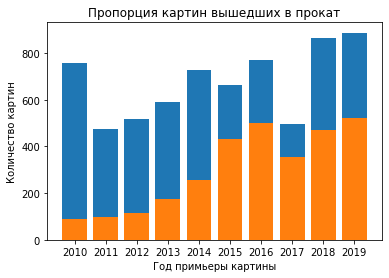

In [65]:
height = film_count_year['punumber']
bars = film_count_year['show_start_year']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)

height = film_count_year['box_office']
bars = film_count_year['show_start_year']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)

plt.title('Пропорция картин вышедших в прокат')
plt.xlabel('Год примьеры картины')
plt.ylabel('Количество картин')

plt.show()

<div class="alert alert-info">
    
Визуализируем наши наблюдения в гистограмме. 

</div>

#### Динамика проката по годам 


- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [66]:
film_sum_box_year = data.pivot_table(index= 'show_start_year',\
                                     values= 'box_office', aggfunc='sum')
film_sum_box_year = film_sum_box_year.reset_index()
film_sum_box_year['box_diff'] = film_sum_box_year['box_office'].diff()
display(film_sum_box_year)

,show_start_year,box_office,box_diff
0,2010,2374340.0,NaN
1,2011,13944390.0,11570050.0
2,2012,6420761.0,-7523629.0
3,2013,29768531.2,23347770.2
4,2014,7372598571.6,7342830040.4
5,2015,32084649858.4,24712051286.8
6,2016,43731250162.3,11646600304.0
7,2017,48561554266.5,4830304104.2
8,2018,47970952311.3,-590601955.2
9,2019,48409400346.6,438448035.3


<div class="alert alert-info">
    
Изучим данные о прокате (сборах), для этого выведем сводную таблицу, где данные о прокате сумированы и сгруппированы по годам. Так же добавим колонку `box_diff` где при помощи функции `diff` посчитаем разнецу значений к предидущему году. 
    В **2010** году наблюдаем минимальные значения в **2 374 340**, а уже через год сумма воросла до **13 944 390**. В **2012** году падение в два раза, до отметки **6 420 761**, а с **2013** начинается устойчивый рост с **29 768 531**, вплоть до **2017** где значения показывают максимум и составляют **48 561 554 266**.

</div>

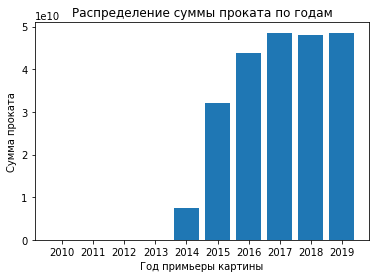

In [67]:
height = film_sum_box_year['box_office']
bars = film_sum_box_year['show_start_year']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)

plt.title('Распределение суммы проката по годам')
plt.xlabel('Год примьеры картины')
plt.ylabel('Сумма проката')

plt.show()

<div class="alert alert-info">
    
Визуализируем наши наблюдения в гистограмме. Из за очень малых значений с **2010** по **2013** год они не видны на графике.

</div>

#### Среднее и медианное значение сборов по годам


In [68]:
film_mm_box_year = data.pivot_table(index= 'show_start_year',\
                                     values= 'box_office', aggfunc= ['mean', 'median'])
film_mm_box_year.columns = ['mean', 'median']
film_mm_box_year = film_mm_box_year.reset_index()
film_mm_box_year['difference'] = film_mm_box_year['mean']-film_mm_box_year['median']
display(film_mm_box_year)

,show_start_year,mean,median,difference
0,2010,26981.1,1868.0,25113.1
1,2011,142289.7,3042.5,139247.2
2,2012,55832.7,6655.0,49177.7
3,2013,169139.4,3565.0,165574.4
4,2014,28687154.0,22490.0,28664664.0
5,2015,74442343.1,4327265.7,70115077.4
6,2016,87462500.3,3650260.9,83812239.4
7,2017,136408860.3,10177833.5,126231026.8
8,2018,101849155.7,8891102.2,92958053.4
9,2019,92738314.8,4774520.5,87963794.3


<div class="alert alert-info">
    
Выведем сводную таблицу по сборам, сгруппируем по годам и добавим среднее и медианное значение. Еще добавим колонку с разницей значений. Наблюдаем, что с **2010** по **2013** год среднее значение не превышает **169 139**, при этом разница с медианным значением более чем в **10** раз. В **2014** году происходит резкий рост среднего значения до показателей в **28 687 154**, при этом медиана на уровне **22 490**. Рост продолжается по **2017** года, где оба значения показывают свои максимумы, среднее значение **136 408 860**, медиана **10 177 833**. 

</div>

#### Влияние возрастной категории на сборы в прокате


In [69]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [70]:
data_age = data.pivot_table(index= 'show_start_year', \
                            columns= 'age_restriction', values= 'box_office', aggfunc= 'sum')
data_age.columns = ['0+', '12+', '16+', '18+', '6+']
data_age = data_age.reset_index()
data_age_filter = data_age[data_age['show_start_year']>=2015]
display(data_age_filter)

,show_start_year,0+,12+,16+,18+,6+
5,2015,273367767.8,11957220583.4,8274253188.9,3184097943.0,8395710375.3
6,2016,149989021.7,12178337053.0,14359349614.8,4990430064.6,12053144408.2
7,2017,229598930.0,7851427660.7,18742889949.1,9651495581.0,12086142145.8
8,2018,32449002.1,14267250435.7,14820922307.9,8745355942.1,10104974623.4
9,2019,17746066.8,12676553693.7,12748542668.1,10114009267.2,12852548650.9


<div class="alert alert-info">
    
Создадим сводную таблицу, где сгруппируем по годам данные по сборам отсортированные по возрастным категориям. Уберем из выборки данные старше **2015** года. 

</div>

In [71]:
data_age_counts = data.pivot_table(index= 'show_start_year', \
                            columns= 'age_restriction', values= 'box_office', aggfunc= 'count')
data_age_counts.columns = ['0+', '12+', '16+', '18+', '6+']
data_age_counts = data_age_counts.reset_index()
data_age_counts_filter = data_age_counts[data_age_counts['show_start_year']>=2015]
display(data_age_counts_filter)

,show_start_year,0+,12+,16+,18+,6+
5,2015,36.0,72.0,158.0,116.0,49.0
6,2016,39.0,80.0,167.0,146.0,68.0
7,2017,3.0,41.0,120.0,147.0,45.0
8,2018,5.0,66.0,155.0,177.0,68.0
9,2019,3.0,83.0,176.0,179.0,81.0


<div class="alert alert-info">
    
Создадим сводную таблицу, где сгруппируем по годам данные о количестве выпущенных в прокат картин и отсортируем по возрастным категориям. Уберем из выборки данные старше **2015** года. 

</div>

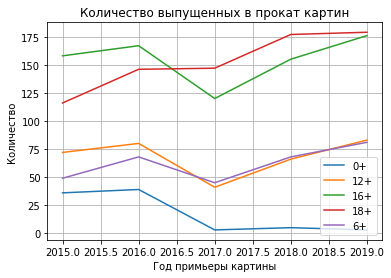

In [72]:
data_age_counts_filter.plot(x= 'show_start_year')
plt.grid(True)
plt.title('Количество выпущенных в прокат картин')
plt.xlabel('Год примьеры картины')
plt.ylabel('Количество')
plt.legend()
plt.show()

<div class="alert alert-info">
    
Создадим диаграмму по количеству выпущенных картин в разных возрастных категориях и сгруппируем по годам. Видим, что категории **"18+"** и **"16+"** выпускаются чаще остальных. Категория **"0+"** самая редкая и выпуски по ней снижаются.   

</div>

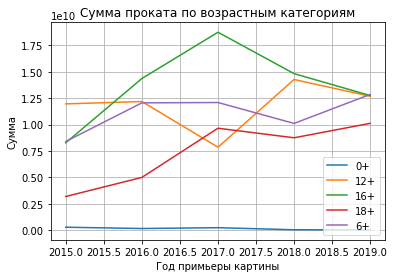

In [73]:
data_age_filter.plot(x= 'show_start_year')
plt.grid(True)
plt.title('Сумма проката по возрастным категориям')
plt.xlabel('Год примьеры картины')
plt.ylabel('Сумма')
plt.legend()
plt.show()

<div class="alert alert-info">
    
Выведем диаграмму категорий по годам наблюдения. В первую очередь выделяется категория **"0+"** сумма проката в этой категории не превышает **273 367 767** и это максимальное значение показанное в **2015** году, дальше эта категория показывает снижение до уровня **17 746 066** в **2019** и это минимальное значение в группе.\
    На втором месте самая возростная категория **"18+"**. С **2015** данная група демонстрирует рост с **3 184 097 943** в **2015** до **10 114 009 267** в **2019**.\
    В категории **"6+"** замечаем колебания, в **2015** значения **8 395 710 375**, затем рост в **2016** до уровня **12 053 144 408**, а в **2018** падение до уровня **10 104 974 623**, но в **2019** рост компенсировал падение и установил максимум в своей группе показав значение в **12 852 548 650**.\
    В категориях **"12+"** и **"16+"** замечаем зависимость, когда одна растет, вторая показывает падение. В **2015** году значения были на уровне **12 178 337 053** у **"12+"** и **14 359 349 614** у **"16+"**, а к **2017** году значения были на уровне **7 851 427 660** у **"12+"** и **18 742 889 949** у **"16+"**. Таким образом категория **"16+"** в **2017** году показала абсолютный максимум по всем группам. 2018 году категория **"12+"** показывает хороший рост до **14 267 250 435**, а категория **"16+"** снижается до **14 820 922 307**.\
    В **2019** категории **"16+"** и **"12+"** показывают снижение на фоне роста категории **"6+"** и все три категории останавливаются в пределах **12 700 000 000**.

</div>

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

In [74]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

<div class="alert alert-info">
    
Посмотрим на данные колонки `financing_source` где указан источник государственной подддержки. В данных много пропусков, их можно заменить значением **"нет данных"**.   

</div>

In [75]:
data['financing_source'] = data['financing_source'].fillna('нет_данных')
data['financing_source'].unique()

array(['нет_данных', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

<div class="alert alert-info">
    
Пропуски заменили.   

</div>

In [76]:
data['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

<div class="alert alert-info">
    
Посмотрим на уникальные значения в колонке с указанием страны изготовителя. Значений очень много, так как при создании многих картин принимают участия разные страны. Нас интересуют картины в создании которых принимала **Россия** и **СССР**.   

</div>

In [77]:
def country (row):
    try:
        if 'СССР' in row:
            return 'Совецкий'
        elif 'Россия' in row:
            return 'Российский'
    except:
        return 'остальные'
data['country'] = data['production_country'].apply(country)
data.groupby('country')['country'].count()

country
Российский    1930
Совецкий       405
Name: country, dtype: int64

<div class="alert alert-info">
    
Создадим функцию которая отфильтрует страну производителя и в отдельную колонку `country` запишет значения **Российский** и **Совецкий**. В итоге мы получили данные по которым видим, что **Россия** принимала участие в создании **1930** картин и **СССР** принимала участие в создании **405** картин.   

</div>

In [78]:
data.groupby('financing_source')['financing_source'].count()

financing_source
Министерство культуры                163
Министерство культуры, Фонд кино      22
Фонд кино                            144
нет_данных                          6416
Name: financing_source, dtype: int64

<div class="alert alert-info">
    
Государственную поддержку получили только **329** картины. Это порядка **17%** от общего числа картин в создании которых принммала **Россия**.   

</div>

In [79]:
data_gp = data[data['financing_source']!= 'нет_данных']
data_gp.head(5)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,fraction_budget,profitability,country
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,33.4,-79046546.4,Российский
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,NaN,28140.0,2014,А.Якимчук,nan,70.0,-37114717.0,Российский
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,61.3,-156066458.5,Российский
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.0,-40518222.5,Российский
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,62.5,-39783022.0,Российский


<div class="alert alert-info">
    
Создадим переменную `data_gp` в которую запишем все картины получившие гос поддержку.
    
</div>

In [80]:
data_gp.groupby('production_country')['production_country'].count()

production_country
Россия                                        313
Россия - Грузия                                 1
Россия, Армения                                 1
Россия, Бельгия, Финляндия                      1
Россия, Германия                                2
Россия, Германия, Великобритания                1
Россия, Германия, Казахстан, Польша, Китай      1
Россия, Италия                                  2
Россия, Латвия, Чешская Республика              1
Россия, Сербия                                  1
Россия, Украина, Польша                         1
Россия, Франция, Латвия                         1
Россия-Китай                                    1
Россия-Словакия-Чехия                           1
Россия-Украина                                  1
Name: production_country, dtype: int64

<div class="alert alert-info">
    
Сгруппируем данные по стране прозводителю. Видим, что **95%** финансируемых государством картин сминаются без участия других стран.
    
</div>

In [81]:
data_gp.groupby('type')['type'].count()

type
Анимационный       31
Документальный      1
Художественный    297
Name: type, dtype: int64

<div class="alert alert-info">
    
Посмотрим на распределение по типу картин. На анимацию приходится только **10%** картин и всего **1** документальный фильм.
    
</div>

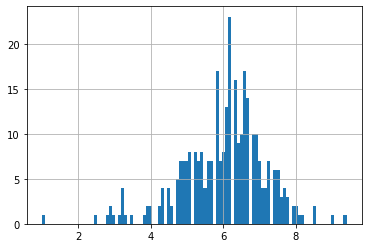

In [82]:
data_gp['ratings'].hist(bins=100)
plt.show()

In [83]:
data_gp['ratings'].describe() 

count   313.0
mean      6.0
std       1.1
min       1.0
25%       5.3
50%       6.2
75%       6.7
max       9.4
Name: ratings, dtype: float64

<div class="alert alert-info">
    
Посмотрим на распределение по полученным рейтингам. Среднее значение **6,0**, медиана **6,2**, минимальное значение **1,0**, а максимальное **9,4**.
    
</div>

In [84]:
main_director = data_gp.groupby('main_director')['main_director'].count()
main_director.sort_values(ascending= False).head(10)

main_director
Р.Давлетьяров    5
Д.Дьяченко       4
С.Андреасян      4
А.Котт           3
А.Аксененко      3
Н.Хомерики       3
А.Цицилин        3
С.Мокрицкий      3
Д.Шмидт          3
К.Шипенко        3
Name: main_director, dtype: int64

<div class="alert alert-info">
    
Посмотрим какие режисеры чаще всего получают господдержку. На лидела **Рената Давлетьярова** приходится не более **5** картин, таким образом можно утверждать, что зависимости между именем режиссера и софинансированием из господдержки нет.
    
</div>

In [85]:
display(data_gp[data_gp['main_director']=='Р.Давлетьяров'])

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,fraction_budget,profitability,country
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,61.3,-156066458.5,Российский
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,нет_данных,«12+» - для детей старше 12 лет,50000000.0,...,Фонд кино,8.5,"драма,военный,история",249166767.7,2015,Р.Давлетьяров,драма,45.3,28578373.7,Российский
2481,Однажды._,111004215,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА"", НП ""Интерфест""",Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,7.9,"драма,криминал,детектив",12748398.3,2015,Р.Давлетьяров,драма,62.0,-143612267.7,Российский
2722,Чистое искусство.,111008715,2015-05-05 12:00:00+00:00,Художественный,"ООО ""КОМПАНИЯ ""РЕАЛ-ДАКОТА""",Россия,Р.Давлетьяров,Р.Давлетьяров,«16+» - для детей старше 16 лет,15000000.0,...,Фонд кино,5.9,"триллер,детектив",6457303.0,2015,Р.Давлетьяров,триллер,53.7,-105278860.0,Российский
6921,Донбасс. Окраина,111007919,2019-06-12 12:00:00+00:00,Художественный,"АНО ""Интерфест"", ООО ""Пропеллер Продакшн""",Россия,Р.Давлетьяров,"Р.Давлетьяров, Г.Поземельный",«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,6.3,"драма,военный,триллер",10933431.9,2019,Р.Давлетьяров,драма,28.4,-94788092.1,Российский


<div class="alert alert-info">
    
Посмотрим на картины которые снял **Ренат Давлетьяров**. 
- "**Невидимки**", снят в **2013** году, рейтинг **5,3**, доля господдержки **61,3%**, рентабельность **-156 066 458**
- "**А зори здесь тихие**", снят в **2015** году, рейтинг **8,5**, доля господдержки **45,3%**, рентабельность **28 578 373**
- "**Однажды**", снят в **2015** году, рейтинг **7,9**, доля господдержки **62%**, рентабельность **-143 612 267**
- "**Чистое искуство**", снят в **2015** году, рейтинг **5,9**, доля господдержки **53,7%**, рентабельность **-105 278 860**
- "**Донбасс. Окраина**", снят в **2019** году, рейтинг **6,3**, доля господдержки **28,4%**, рентабельность **-94 788 092**\
    Явной зависимости между картинами не прослеживается, есть драмы, есть комедия и триллер, при этом **4** из **5** картин с **отрицательной рентабельностью**. 
    
</div>

In [86]:
main_genres = data_gp.groupby('main_genres')['main_genres'].count()
main_genres.sort_values(ascending= False).head(10)

main_genres
драма         92
комедия       74
мультфильм    31
nan           16
триллер       15
мелодрама     15
ужасы         10
фантастика    10
фэнтези       10
военный        9
Name: main_genres, dtype: int64

<div class="alert alert-info">
    
Посмотрим на распределение по **жанрам**. Драммы снимают чаще всего (показатель **92** картины), затем комедии (показатель **74** картины), а вот мультфильмы уже в два раза меньше (показатель **31** картина), военные фильмы на последнем месте (показатель **9** картин).
    
</div>

In [87]:
data_gp.groupby('show_start_year')['show_start_year'].count()

show_start_year
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    67
Name: show_start_year, dtype: int64

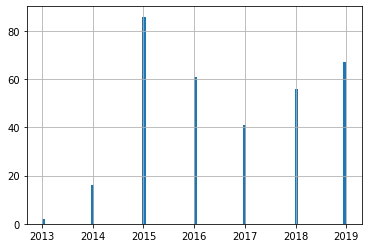

In [88]:
data_gp['show_start_year'].hist(bins=100)
plt.show()

<div class="alert alert-info">
    
Посмотрим на распределение по количеству картин в год. В **2013** всего **2**, в **2014** уже **16**, а в **2015** показатель показывает максимальное значение **86**, затем видим падение в течении **2** лет до уровня **41** картина в **2017**. В **2018** и **2019** заметен рост до **67** картин в **2019**.
    
</div>

In [89]:
data_gp.groupby('age_restriction')['age_restriction'].count()

age_restriction
«0+» - для любой зрительской аудитории      8
«12+» - для детей старше 12 лет           104
«16+» - для детей старше 16 лет           124
«18+» - запрещено для детей                28
«6+» - для детей старше 6 лет              65
Name: age_restriction, dtype: int64

<div class="alert alert-info">
    
Посмотрим на распределение по возрастным категориям. **«16+»** самая популярная (показатель **124** картин), **«12+»** на втором месте с показателем в **104** картин, остальные категории в четыри раза меньше.
    
</div>

In [90]:
data_gp['fraction_budget'].describe()

count   328.0
mean      inf
std       NaN
min       0.0
25%      31.9
50%      48.5
75%      65.0
max       inf
Name: fraction_budget, dtype: float64

<div class="alert alert-info">
    
Посмотрим на распределение по долиям участия господдержки. Медиана в районе **48%**, нормальное распределение от **32%** до **65%**.
    
</div>

In [91]:
data_gp['profitability'].describe()

count           316.0
mean        5205385.5
std       319982925.8
min     -1971477243.4
25%       -70050755.8
50%       -40060257.5
75%         2709907.2
max      2913568690.8
Name: profitability, dtype: float64

<div class="alert alert-info">
    
Посмотрим показатели рентабельности. Среднее значение **5 205 385**, а медиана **-40 060 257**, разница очень большая, это связано со значением максимума **2 913 568 690**, при этом минимум на уровне **-1 971 477 243**.
    
</div>

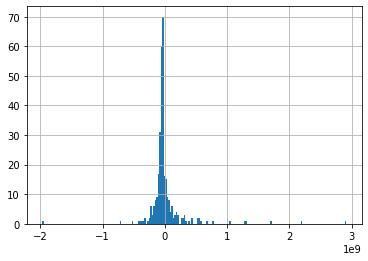

In [92]:
data_gp['profitability'].hist(bins=200)
plt.show()

<div class="alert alert-info">
    
На гистограмме это видно более наглядно, основная масса, это отрицательные значения.
    
</div>

In [93]:
data_gp_fin = data_gp.pivot_table(index= 'show_start_year', values= ['nonrefundable_support', 'budget', 'profitability'], aggfunc= 'sum')
data_gp_fin = data_gp_fin.reset_index()
display(data_gp_fin)

,show_start_year,budget,nonrefundable_support,profitability
0,2013,255435390.0,134347945.0,-235113004.9
1,2014,1279484783.0,501002299.0,-262062616.4
2,2015,7309669207.0,3019088340.0,-1482384804.9
3,2016,7228942748.0,3381655482.0,-1128528828.9
4,2017,6972172568.0,2464624781.0,3998502733.0
5,2018,6651694634.0,2784969465.0,3282374376.2
6,2019,11475866609.0,3526000000.0,-2527886039.4


<div class="alert alert-info">
    
Посмотрим на финансовое распределение по годам. В финансовом плане успешными можно считать полько **2017** и **2018** года с показателями **3 998 502 733** и **3 282 374 376** соответственно. Все остальные показывали убытки **2013**  **(-235 113 004)**, **2014**  **(-262 062 616)**, **2015**  **(-1 482 384 804)**, **2016**  **(-1 128 528 828)** и **2019**  **(-2 527 886 039)**, что является максимальным значением.
    
</div>

In [94]:
data_gp.sort_values(by= 'box_office', ascending= False).head(5)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,fraction_budget,profitability,country
7455,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,...,Фонд кино,6.8,комедия,3073568690.8,2019,К.Шипенко,комедия,21.9,2913568690.8,Российский
5652,Движение вверх,111011817,2017-12-21 12:00:00+00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.0,...,Фонд кино,7.5,"спорт,драма",2779686144.0,2017,А.Мегердичев,спорт,67.8,2189493953.0,Российский
6548,Т-34,111024918,2018-12-21 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,60000000.0,...,Фонд кино,6.5,"драма,военный,боевик",2271754004.5,2018,А.Сидоров,драма,21.3,1707969287.5,Российский
5504,Последний богатырь,111007017,2017-10-19 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,50000000.0,...,Фонд кино,6.8,"комедия,фэнтези,приключения",1655037688.0,2017,Д.Дьяченко,комедия,14.2,1302560113.0,Российский
5707,Лёд,111000518,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,25000000.0,...,Фонд кино,NaN,NaN,1445731797.9,2018,О.Трофим,nan,40.4,1297146575.9,Российский


<div class="alert alert-info">
    
Посмотрим на *лидеров* по сборам в прокате:
 1) "**Холоп**", 2019 года, категория "12+", рейтинг **6,8**, сборы **3 073 568 690**, рентабельность **2 913 568 690**
    
 2) "**Движение вверх**", 2017 года, категория "6+", рейтинг **7,5**, сборы **2 779 686 144**, рентабельность **2 189 493 953**
    
 3) "**Т-34**", 2018 года, категория "12+", рейтинг **6,5**, сборы **2 271 754 004**, рентабельность **1 707 969 287**
    
 4) "**Последний богатырь**", 2017 года, категория "12+", рейтинг **6,8**, сборы **1 655 037 688**, рентабельность **1 302 560 113**
    
 5) "**Лёд**", 2018 года, категория "12+", рейтинг ""нет", сборы **1 445 731 797**, рентабельность **1 297 146 575**\
    Картины разные, из объеденяющих факторов, это возростная категория. Интересно, что рейтин не карелирует с успешностью в прокате, значения **6,8** это чуть выше среднего.
    
</div>

In [95]:
data_gp.sort_values(by= 'profitability', ascending= True).head(5)

,title,punumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_director,main_genres,fraction_budget,profitability,country
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,...,Фонд кино,5.8,"приключения,фэнтези",333597059.6,2019,О.Степченко,приключения,3.9,-1971477243.4,Российский
7170,Грех,111014419,2019-08-31 12:00:00+00:00,Художественный,НО Фонд Андрея Кончаловского по поддержке кино...,"Россия, Италия",А.Михалков (псевдоним А.Кончаловский),НО Фонд Андрея Кончаловского по поддержке кино...,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.9,"драма,биография,история",54243202.7,2019,А.Михалков (псевдоним А.Кончаловский),драма,7.7,-725698762.3,Российский
5436,Матильда,111005717,2017-08-17 12:00:00+00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,110000000.0,...,Фонд кино,7.7,"фэнтези,комедия,семейный",511775548.0,2017,А.Учитель,фэнтези,18.4,-521130409.0,Российский
2141,Территория,111000515,2015-01-27 12:00:00+00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,30000000.0,...,Фонд кино,6.8,"детектив,фэнтези,триллер",72578317.4,2015,А.Мельник,детектив,6.0,-427421682.6,Российский
6886,Девятая,111007019,2019-09-19 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Н.Хомерики,"С.Мелькумов, А.Роднянский",«16+» - для детей старше 16 лет,0.0,...,Фонд кино,5.8,"детектив,триллер,криминал",55876887.4,2019,Н.Хомерики,детектив,66.1,-397827778.6,Российский


<div class="alert alert-info">
    
Посмотрим на лидеров отрицательного рейтинга, картины с провальной рентабельностью:
    
 1) "**Тайна Печати Дракона**", 2019 года, категория "6+", рейтинг **5,8**, сборы **333 597 059**, рентабельность **-1 971 477 243**\
 2) "**Грех**", 2019 года, категория "16+", рейтинг **6,9**, сборы **54 243 202**, рентабельность **-725 698 762**\
 3) "**Матильда**", 2017 года, категория "16+", рейтинг **7,7**, сборы **511 775 548**, рентабельность **-521 130 409**\
 4) "**Территория**", 2015 года, категория "12+", рейтинг **6,8**, сборы **72 578 317**, рентабельность **-427 421 682**\
 5) "**Девятая**", 2019 года, категория "16+", рейтинг **5,8**, сборы **55 876 887**, рентабельность **-397 827 778**\
    В данной подборке так же подтвердилось утверждение, что высокий рейтинг не есть показатель успешности как бизнес проекта.
    
    
</div>

In [96]:
data_gp.corr()

,punumber,refundable_support,nonrefundable_support,budget,ratings,box_office,show_start_year,fraction_budget,profitability
punumber,1.0,0.0,-0.0,-0.0,0.0,0.1,-0.0,0.0,0.0
refundable_support,0.0,1.0,0.3,0.6,-0.0,0.3,0.1,-0.4,-0.0
nonrefundable_support,-0.0,0.3,1.0,0.6,0.1,0.5,0.1,0.1,0.2
budget,-0.0,0.6,0.6,1.0,0.1,0.4,0.2,-0.3,-0.2
ratings,0.0,-0.0,0.1,0.1,1.0,0.1,0.0,0.0,0.1
box_office,0.1,0.3,0.5,0.4,0.1,1.0,0.1,-0.2,0.8
show_start_year,-0.0,0.1,0.1,0.2,0.0,0.1,1.0,-0.1,0.0
fraction_budget,0.0,-0.4,0.1,-0.3,0.0,-0.2,-0.1,1.0,-0.0
profitability,0.0,-0.0,0.2,-0.2,0.1,0.8,0.0,-0.0,1.0


<div class="alert alert-info">
    
Посмотрим на общее значение корреляции среди группы. Самое большое значение **0.8** наблюдается между показателями **сборы в прокате и рентабельностью**, далее положительная зависимость со значением в **0.6** наблюдается между **бюджетом и возвратными и не возвратными средствами**. Отрицательная зависимость между **долей бюджета и возвратными средствами** отразилась в значении **-0.4**. 
    
</div>

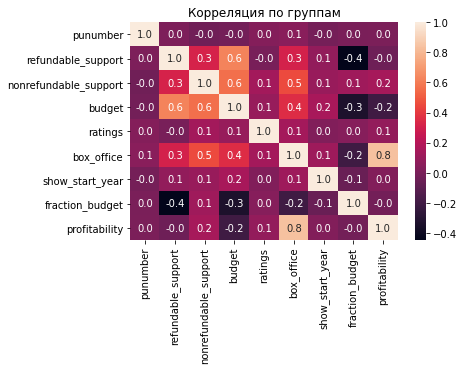

In [97]:
sns.heatmap(data_gp.corr(), annot=True, fmt=".1f")
plt.title('Корреляция по группам')
plt.show()

<div class="alert alert-info">
    
Построим тепловую карту по значениям корреляции, на ней сразу выделяются области зависимости описанные ранее. 
    
</div>

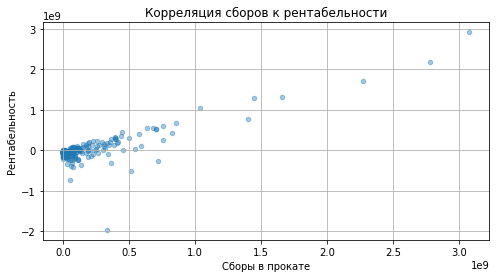

In [98]:
data_gp.plot(x='box_office', y='profitability', kind= 'scatter', grid=True, figsize=(8, 4), alpha=0.4)
plt.title('Корреляция сборов к рентабельности')
plt.xlabel('Сборы в прокате')
plt.ylabel('Рентабельность')
plt.show()

<div class="alert alert-info">
    
Построим диаграмму рассеивания между показателями **рентабельность и сборы в прокате**, на ней мы наблюдаем подтверждение значений корреляции в **0.8**, что в свою очередь подтверждает положительную зависимость этих факторов. 
    
</div>

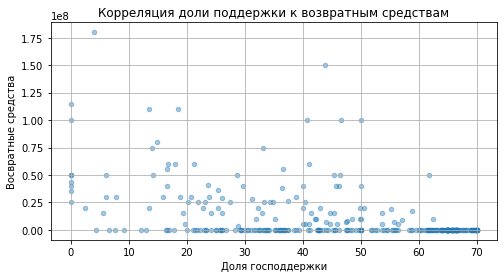

In [99]:
data_gp.plot(x='fraction_budget', y='refundable_support', kind= 'scatter', grid=True, figsize=(8, 4), alpha=0.4)
plt.title('Корреляция доли поддержки к возвратным средствам')
plt.xlabel('Доля господдержки')
plt.ylabel('Восвратные средства')
plt.show()

<div class="alert alert-info">
    
Посмотрим на диаграмму рассеивания между **долей господдержки и возвратными средствами**, корреляция на уровне значений **-0.4**, говорит о слабой отрицательной зависимости. График это утверждение подтверждает визуально. 
    
</div>

### Шаг 5. Общий вывод

<div style="border:solid Red 2px; padding: 10px">
<div class="alert alert-info">
    
 <font color='red'>**Исследование данных о российском кинопрокате за период с 2010 по 2019 год**.</font> 
    
**1)** Перед началом анализа, мы импортировали ряд библиотек, тех которые потенциально могут пригодится исходя из задачи. А именно: `matplotlib` (*для построения графиков*), `pandas` (*для работы с данными*), `numpy`(*для работы с вычислениями*), `seaborn` (*для более сложных графиков*), `IPython.display` (*для презентабельного вывода значений в процессе анализа*) и надстройку формата отображения чисел. Далее открыли первый файл и записали его в переменную `mkrf_movies`. Первый датафрейм содержит данные о кинокартинах, они распределены по следующим колонкам:
- `title` - *название фильма*
- `puNumber` - *номер прокатного удостоверения* 
- `show_start_date` - *дата премьеры фильма*
- `type` - *тип фильма*
- `film_studio` - *студия-производитель*
- `production_country` - *страна-производитель*
- `director` - *режиссёр*
- `producer` - *продюсер*
- `age_restriction` - *возрастная категория*
- `refundable_support` - *объём возвратных средств государственной поддержки*
- `nonrefundable_support` - *объём невозвратных средств государственной поддержки*
- `budget` - *общий бюджет фильма*
- `financing_source` - *источник государственного финансирования*
- `ratings` - *рейтинг фильма на КиноПоиске*
- `genres` - *жанр фильма*\
    Всего **7486** строк. Далее открыли второй файл и записали его в переменную `mkrf_shows`. Второй датафрейм содержит данные о сборах в прокате, всего **3158** строк, они распределены в две колонки:
- `puNumber` - *номер прокатного удостоверения*
- `box_office` - *сборы в рублях*\
    И первый и второй датафрейм содержит данные о номере прокатного удостоверения, колонка `puNumber`, по этой колонке осуществим объединение двух файлов в один и запишем в переменную `data`.
    
**2)** **На этапе предобработки**:
- В колонке `puNumber` исправили название, привели к общему нижнему регистру.
- В колонке `show_start_date` указана дата премьеры, поэтому заменили тип с `object` на `datetime64`.
- В колонке `ratings` присутствовали значения со знаком **"%"**. Их переименовали приведя все значения в формат `float`.
- В колонке `film_studio` обнаружили **18** пропусков, это около четверти процента. Поэтому их просто удалили.
- В колонке `production_country` обнаружили **2** пропусков, это не существенное кол-во. Поэтому их просто удалили.
- В колонке `director` обнаружили **9** пропусков, это не существенное кол-во. Поэтому их просто удалили.
- В колонке `producer` обнаружено **564**, это **7,5%** от общей массы. Это список продюсеров принимающих участие в создании картины. Не смотря на то, что значений не много, оставили их для анализа, а пропуски заменим указателем **"нет_данных"**.
- Проверили датафрейм на наличие дубликатов. Дубликатов не выявлено.
- В колонке `type` обнаружили не явный дубликат (Художественный и Анимационный записан с пробелом в начале). Это исправили методом `str.strip()`.
    
**3)** **Проверили колонки с финансовой информацией**:
- Колонка `refundable_support` с данными о возвратных средствах содержит **329** записей. Медианное значение **0**, минимум **0**, среднее значение **11 653 495**, максимум **180 000 000**. При сортировке значений по убыванию первые девять значений показывают больше **100 000 000**.
- Колонка `nonrefundable_support` с данными о не возвратных средствах содержит **329** записей. Медианное значение **30 000 000**, минимум **0**, среднее значение **48 059 842**, максимум **400 000 000**. При сортировке значений по убыванию первая тройка показывает значения **400 000 000**.
- Колонка `budget` с данными о бюджете содержит **329** записей. Медианное значение **68 490 606**, минимум **0**, среднее значение **125 146 705**, максимум **2 305 074 303**. При сортировке по убыванию, первая и вторая позиции с разницей в **миллиард**. В бюджет уже входит сумма не возвратных средств.
- Колонка `box_office` с данными о сборах в прокате содержит **3014** записей. Медианное значение **2 435 268**, минимум **0**, среднее значение **75 707 668**, максимум **3 073 568 690**. Отсортированные по убыванию первые шесть позиций больше **2 000 000 000**.
    
**4)** **Добавили колонки необходимые в дальнейшем анализе**:
- Создали новую колонку `show_start_year` с обозначением года премьеры картины, данные сформировали из колонки `show_start_date` методом `pd.DatetimeIndex` с указанием индекса округления `year`.
- Создали новую колонку `main_director` с обозначением главного режиссера. Для этого создадим функцию `main` которая преобразует строку в список разделив его по запятой и выведет первое значение списка, далее применим ее к колонке `director`.
- Создали новую колонку `main_genres` с обозначением основного жанра картины. Для этого применим нашу функцию `main` которая преобразует строку в список разделив его по запятой и выведет первое значение списка, далее применим ее к колонке `genres`.
- Создали колонку `fraction_budget` в которой посчитали конверсию невозвратных средств к бюджету. Медианное значение **48,5%**, зона нормального распределения от **31,9%** до **65%**.
- Создали колонку `profitability` в ней посчитаем рентабельность путем вычитания бюджета из значения сборов в прокате. 
    
**5)** **Провели исследовательский анализ данных**:
- Количество вышедших в прокат и общее количество картин. Создали переменную `film_count_year`, в нее записали сводную таблицу сгруппированную по годам выхода картин. В таблице в колонке `box_office` указано количество картин показанных в кинотеатрах, а в колонке `punumber` общее количество картин получивших прокатные удостоверения. Далее добавили колонку `proportion` в которой посчитали долю показанных картин от общего количества. Из полученной таблицы, мы видим, что доля картин вышедших в прокат расла от года к году, если в **2010** году доля составляла **11,6%**, то в **2011** уже **20,6%**, в **2012** **22,3%**. Рост продолжался до **2017** года, где доля картин составила **71,5%**. В **2018** году произошло снижение до **54,5%**, но уже **2019** вновь показало рост до **58,9%**. При этом график общего количество картин не коррелируется с долей проката. В **2010** было снято **757** картин. В **2011** число картин **475** что является минимальным значением за весь период выборки, а в **2014-2016** число картин было в среднем **730**. В **2017** видим падение до **498**, в **2018** замечаем резкий рост до уровня в **864** картину, а в **2019** наблюдаем значение в **887** картин, что является максимальным значением за рассматриваемый период выборки.
-  Динамика проката по годам. Изучили данные о прокате (сборах), для этого вывели сводную таблицу, где данные о прокате суммированы и сгруппированы по годам. Так же добавили колонку `box_diff` где при помощи функции `diff` посчитали разницу значений к предыдущему году. В **2010** году наблюдаем минимальные значения в **2 374 340**, а уже через год сумма воросла до **13 944 390**. В **2012** году падение в два раза, до отметки **6 420 761**, а с **2013** начинается устойчивый рост с **29 768 531**, вплоть до **2017** где значения показывают максимум и составляют **48 561 554 266**.
- Среднее и медианное значение сборов по годам. Вывели сводную таблицу по сборам, сгруппировали по годам и добавили среднее и медианное значение. Еще добавили колонку с разницей значений. Наблюдаем, что с **2010** по **2013** год среднее значение не превышает **169 139**, при этом разница с медианным значением более чем в **10** раз. В **2014** году происходит резкий рост среднего значения до показателей в **28 687 154**, при этом медиана на уровне **22 490**. Рост продолжается по **2017** года, где оба значения показывают свои максимумы, среднее значение **136 408 860**, медиана **10 177 833**.
- Влияние возрастной категории на сборы в прокате. Для этого создали сводную таблицу, где сгруппировали по годам данные по сборам отсортированные по возрастным категориям. Убрали из выборки данные старше **2015** года. Так же создали сводную таблицу, где сгруппировали по годам данные о количестве выпущенных в прокат картин и отсортировали по возрастным категориям. Убрали из выборки данные старше 2015 года. Дополнительно вывели две диаграммы, по количеству выпущенных картин и по сумме сборов в прокате. В первую очередь выделяется категория **"0+"** сумма проката в этой категории не превышает **273 367 767** и это максимальное значение показанное в **2015** году, дальше эта категория показывает снижение до уровня **17 746 066** в **2019** и это минимальное значение в группе.\
    На втором месте самая возростная категория **"18+"**. С **2015** данная група демонстрирует рост с **3 184 097 943** в **2015** до **10 114 009 267** в **2019**.\
    В категории **"6+"** замечаем колебания, в **2015** значения **8 395 710 375**, затем рост в **2016** до уровня **12 053 144 408**, а в **2018** падение до уровня **10 104 974 623**, но в **2019** рост компенсировал падение и установил максимум в своей группе показав значение в **12 852 548 650**.\
    В категориях **"12+"** и **"16+"** замечаем зависимость, когда одна растет, вторая показывает падение. В **2015** году значения были на уровне **12 178 337 053** у **"12+"** и **14 359 349 614** у **"16+"**, а к **2017** году значения были на уровне **7 851 427 660** у **"12+"** и **18 742 889 949** у **"16+"**. Таким образом категория **"16+"** в **2017** году показала абсолютный максимум по всем группам. 2018 году категория **"12+"** показывает хороший рост до **14 267 250 435**, а категория **"16+"** снижается до **14 820 922 307**.\
    В **2019** категории **"16+"** и **"12+"** показывают снижение на фоне роста категории **"6+"** и все три категории останавливаются в пределах **12 700 000 000**.
    
**6)** **Провели исследования фильмов, которые получили государственную поддержку**:
- Источником финансирования со стороны государства являются **Министерство культуры** и **Фонд кино**, иногда совместно.
- **Россия** принимала участие в создании **1930** картин и **СССР** принимала участие в создании **405** картин, что составляет **28%** от общего числа выборки.
- Государственную поддержку получили только **329** картины. Это порядка **17%** от общего числа картин в создании которых принимала Россия.
- Определили, что **95%** финансируемых государством картин сминаются без участия других стран.
- Выявили распределение картин по типу. Основная доля **90%** это художественные картины, на анимацию приходится только **10%** картин и всего **1** документальный фильм.
- Выявили распределение по полученным рейтингам. Среднее значение **6,0**, медиана **6,2**, минимальное значение **1,0**, а максимальное **9,4**.
- Выявили какие режиссеры чаще всего получают господдержку. На лидера **Рената Давлетьярова** приходится не более **5** картин, таким образом можно утверждать, что зависимости между именем режиссера и софинансированием из господдержки нет.
- Посмотрели на картины которые снял **Ренат Давлетьяров**. 
1. "**Невидимки**", снят в **2013** году, рейтинг **5,3**, доля господдержки **61,3%**, рентабельность **-156 066 458**
2. "**А зори здесь тихие**", снят в **2015** году, рейтинг **8,5**, доля господдержки **45,3%**, рентабельность **28 578 373**
3. "**Однажды**", снят в **2015** году, рейтинг **7,9**, доля господдержки **62%**, рентабельность **-143 612 267**
4. "**Чистое искусство**", снят в **2015** году, рейтинг **5,9**, доля господдержки **53,7%**, рентабельность **-105 278 860**
5. "**Донбасс. Окраина**", снят в **2019** году, рейтинг **6,3**, доля господдержки **28,4%**, рентабельность **-94 788 092**\
    Явной зависимости между картинами не прослеживается, есть драмы, есть комедия и триллер, при этом **4** из **5** картин с **отрицательной рентабельностью**. 
- Выявили распределение по жанрам. *Драмы* снимают чаще всего (показатель **93** картины), затем *комедии* (показатель **74** картины), а вот *мультфильмы* уже в два раза меньше (показатель **31** картина), *военные фильмы* на последнем месте (показатель *9* картин).
- Выявили распределение по количеству картин в год. В **2013** всего **2**, в **2014** уже **16**, а в **2015** показатель показывает максимальное значение **86**, затем видим падение в течении **2** лет до уровня **41** картина в **2017**. В **2018** и **2019** заметен рост до **67** картин в **2019**.
- Выявили распределение по возрастным категориям. «**16+**» самая популярная (показатель **124** картин), «**12+**» на втором месте с показателем в **104** картин, «**6+**» (показатель **65** картин), «**18+**» (показатель **28** картин) и «**0+**» (показатель **8** картин)**.
- Выявили показатели рентабельности. Среднее значение **5 205 385**, а медиана **-40 060 257**, разница очень большая, это связано со значением максимума **2 913 568 690**, при этом минимум на уровне **-1 971 477 243**.
- Финансовое распределение по годам. В финансовом плане успешными можно считать полько **2017** и **2018** года с показателями **3 998 502 733** и **3 282 374 376** соответственно. Все остальные показывали убытки **2013**  **(-235 113 004)**, **2014**  **(-262 062 616)**, **2015**  **(-1 482 384 804)**, **2016**  **(-1 128 528 828)** и **2019**  **(-2 527 886 039)**, что является максимальным значением.
- Посмотрели на *лидеров* по сборам в прокате:
1. "**Холоп**", 2019 года, категория "12+", рейтинг **6,8**, сборы **3 073 568 690**, рентабельность **2 913 568 690**
    
2. "**Движение вверх**", 2017 года, категория "6+", рейтинг **7,5**, сборы **2 779 686 144**, рентабельность **2 189 493 953**
    
3. "**Т-34**", 2018 года, категория "12+", рейтинг **6,5**, сборы **2 271 754 004**, рентабельность **1 707 969 287**
    
4. "**Последний богатырь**", 2017 года, категория "12+", рейтинг **6,8**, сборы **1 655 037 688**, рентабельность **1 302 560 113**
    
5. "**Лёд**", 2018 года, категория "12+", рейтинг ""нет", сборы **1 445 731 797**, рентабельность **1 297 146 575**\
    Картины разные, из объединяющих факторов, это возрастная категория. Интересно, что рейтинг не коррелирует с успешностью в прокате, значения **6,8** это чуть выше среднего.
- Посмотрели на лидеров отрицательного рейтинга, картины с провальной рентабельностью:
    
1. "**Тайна Печати Дракона**", 2019 года, категория "6+", рейтинг **5,8**, сборы **333 597 059**, рентабельность **-1 971 477 243**
2. "**Грех**", 2019 года, категория "16+", рейтинг **6,9**, сборы **54 243 202**, рентабельность **-725 698 762**
3. "**Матильда**", 2017 года, категория "16+", рейтинг **7,7**, сборы **511 775 548**, рентабельность **-521 130 409**
4. "**Территория**", 2015 года, категория "12+", рейтинг **6,8**, сборы **72 578 317**, рентабельность **-427 421 682**
5. "**Девятая**", 2019 года, категория "16+", рейтинг **5,8**, сборы **55 876 887**, рентабельность **-397 827 778**\
    В данной подборке так же подтвердилось утверждение, что высокий рейтинг не есть показатель успешности как бизнес проекта.
- Вывели общее значение корреляции среди группы. Самое большое значение **0.8** наблюдается между показателями **сборы в прокате и рентабельностью**, далее положительная зависимость со значением в **0.6** наблюдается между **бюджетом и возвратными и не возвратными средствами**. Отрицательная зависимость между **долей бюджета и возвратными средствами** отразилась в значении **-0.4**. 
- Построили диаграмму рассеивания между показателями **рентабельность и сборы в прокате**, на ней мы наблюдаем подтверждение значений корреляции в **0.8**, что в свою очередь подтверждает положительную зависимость этих факторов.
- Посмотрели на диаграмму рассеивания между **долей господдержки и возвратными средствами**, корреляция на уровне значений **-0.4**, говорит о слабой отрицательной зависимости. График это утверждение подтверждает визуально.
    
    Резюмируя итоги, хочется отметить, что в России кинобизнес, это история не про бизнес, а скорее про искусство, на это наводят данные по рентабельности. Тем не менее, индустрия показывает рост как в количестве, так и в качестве. 
    
    
</div>